# import any potentially needed libraries

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# import our dataset

In [238]:
dataset = pd.read_csv(r"C:\Users\Shehab\Desktop\data.csv")

# KNN WILL BE IMPLEMENTED FIRSTLY
# the target (dependant) variable will be the 'result' column

In [240]:
target = dataset.result

# all other variables (all other columns) will be the independant variables

In [241]:
attributes = list(zip(dataset.location,
                     dataset.country,
                     dataset.gender,
                     dataset.age,
                     dataset.vis_wuhan,
                     dataset.from_wuhan,
                     dataset.symptom1,
                     dataset.symptom2,
                     dataset.symptom3,
                     dataset.symptom4,
                     dataset.symptom5,
                     dataset.symptom6,
                     dataset.diff_sym_hos))

# now we will split the dataset into training, validation and testing

In [207]:
target_train, target_test = train_test_split(target, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_test = train_test_split(attributes, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)

# now the data is split into training(85%) and testing(15%) only

# lets now split the training part into a smaller training part plus the validation part

In [208]:
target_train, target_validate = train_test_split(target_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_validate = train_test_split(attributes_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)

# now both training sets are 70%, both validations are 15% and both tests are 15%

# scaling the data (because some of them have very wide ranges like the location while others are not, and this will result in bad outcomes from the KNN algorithm)

In [209]:
scaler = StandardScaler()
scaler.fit(attributes_train)
attributes_train = scaler.transform(attributes_train)
attributes_validate = scaler.transform(attributes_validate)
attributes_test = scaler.transform(attributes_test)

# Calculating error for K values between 1 and 50 to choose the best k value from the graph

In [210]:
error = [] # we will store in this array the accuracy at each K value
for i in range(1, 50):
     knn = KNeighborsClassifier(n_neighbors=i) # applying KNN at each K value
     knn.fit(attributes_train, target_train)
     target_pred = knn.predict(attributes_validate) # here we use the validation part, not the testing part
        # why used validation part not the testing one?
        # because here we are trying to find out the best K value (choosing the best hyperparameter)
     error.append(np.mean(target_pred != target_validate))

Text(0, 0.5, 'Mean Error')

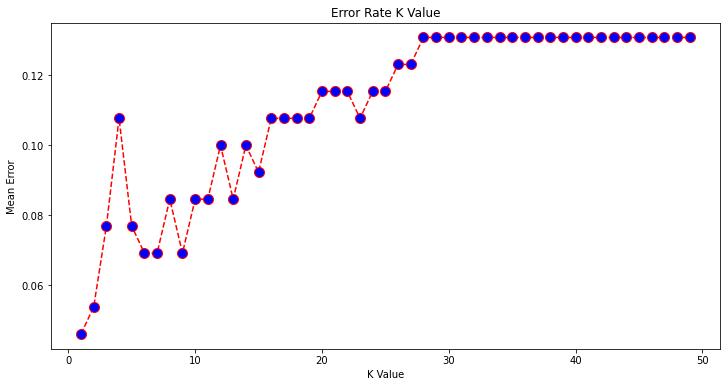

In [211]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# best k value from the graph is 1

In [212]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(attributes_train, target_train)
target_pred = knn.predict(attributes_test) # here we use the testing part since the validation part role is over now

In [213]:
accuracy = accuracy_score(target_test,target_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9538461538461539


In [214]:
print('Precision: %.3f' % precision_score(target_test, target_pred))

Precision: 0.917


In [215]:
print('Recall: %.3f' % recall_score(target_test, target_pred))

Recall: 0.688


In [216]:
print('F1 Score: %.3f' % f1_score(target_test, target_pred))

F1 Score: 0.786


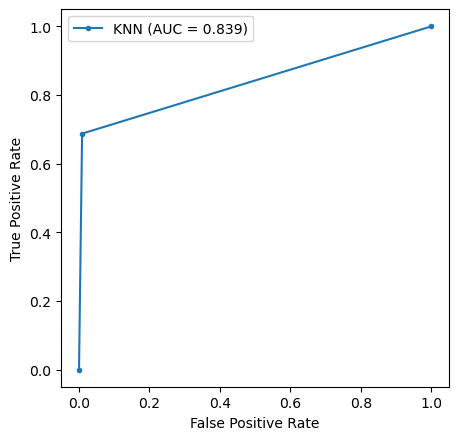

In [217]:
# lets draw the ROC curve
fpr, tpr, threshold = roc_curve(target_test, target_pred) # fpr is the False Positive Rate, tpr is the True Positive Rate
auc = auc(fpr, tpr) # auc is the Area Under Curve (by Curve we mean the ROC curve of course)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='KNN (AUC = %0.3f)' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# NOW WE WILL IMPLEMENT THE LOGISTIC REGRESSION

In [223]:
target_train, target_test = train_test_split(target, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_test = train_test_split(attributes, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)

In [224]:
target_train, target_validate = train_test_split(target_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_validate = train_test_split(attributes_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)

In [225]:
scaler = StandardScaler()
scaler.fit(attributes_train)
attributes_train = scaler.transform(attributes_train)
attributes_validate = scaler.transform(attributes_validate)
attributes_test = scaler.transform(attributes_test)

In [226]:
# now what are the hyperparameters we are going to focus on in the logistic regression ?
# we will have a fixed 'random_state' to start from (5)
# we will try out different 'C' values (0.1 & 0.3 & 0.5 & 0.7 & 0.9 & 1.0 & 1.3 & 1.6 & 1.8 & 2.0 & 3.0 & 4.0 & 5.0)
# 'C' values indicate the regularization strength (smaller values results in a stronger regularization)

In [227]:
C_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.6,1.8,2.0,3.0,4.0,5.0]

In [228]:
error = []
for i in range(13):
    logreg = LogisticRegression(random_state = 5, C = C_values[i])
    logreg.fit(attributes_train, target_train)
    target_pred = logreg.predict(attributes_validate)
    error.append(np.mean(target_pred != target_validate))

Text(0, 0.5, 'Mean Error')

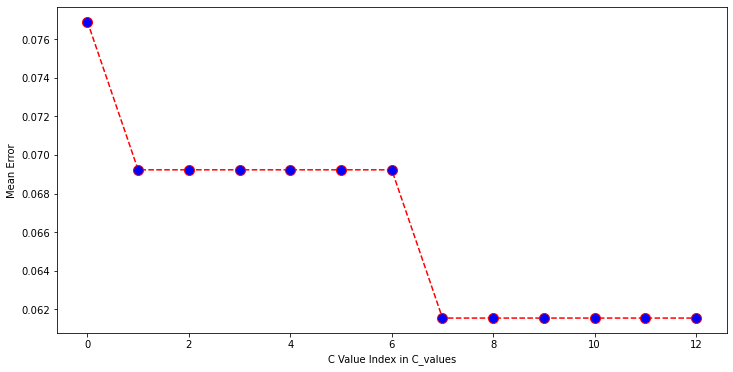

In [229]:
plt.figure(figsize=(12, 6))
plt.plot(range(13), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.xlabel('C Value Index in C_values')
plt.ylabel('Mean Error')

In [230]:
# so from the graph, we figure out that the best C value possible is any C value index between 7 & 12

In [231]:
logreg = LogisticRegression(random_state = 5, C = C_values[8])
logreg.fit(attributes_train, target_train)
target_pred = logreg.predict(attributes_test)

In [232]:
accuracy = accuracy_score(target_test,target_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9461538461538461


In [233]:
print('Precision: %.3f' % precision_score(target_test, target_pred))

Precision: 0.909


In [234]:
print('Recall: %.3f' % recall_score(target_test, target_pred))

Recall: 0.625


In [235]:
print('F1 Score: %.3f' % f1_score(target_test, target_pred))

F1 Score: 0.741


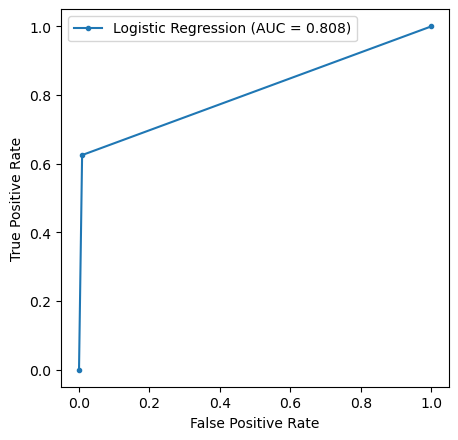

In [236]:
fpr, tpr, threshold = roc_curve(target_test, target_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.3f)' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# NOW WE WILL IMPLEMENT THE NAIVE BAYES

In [242]:
target_train, target_test = train_test_split(target, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_test = train_test_split(attributes, test_size = 0.15, train_size = 0.85, random_state = 42, shuffle = True, stratify = None)

In [243]:
target_train, target_validate = train_test_split(target_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)
attributes_train, attributes_validate = train_test_split(attributes_train, test_size = 0.17645, random_state = 42, shuffle = True, stratify = None)

In [244]:
# now what are the hyperparameters we are going to focus on in the naive bayes ?
# we will focus on "var_smoothing", we will try out different var_smoothing values
# var_smoothing is the portion of the biggest variance of all attributes added to variances to achieve stability in calculation

In [245]:
var_values = [1e-8,1e-9,1e-10,5e-8,5e-9,5e-10]

In [246]:
error = []
for i in range(6):
    naive = GaussianNB(var_smoothing = var_values[i])
    naive.fit(attributes_train, target_train)
    target_pred = naive.predict(attributes_validate)
    error.append(np.mean(target_pred != target_validate))

Text(0, 0.5, 'Mean Error')

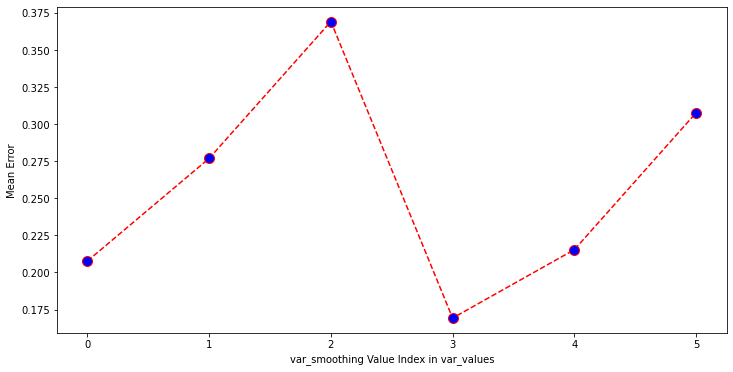

In [247]:
plt.figure(figsize=(12, 6))
plt.plot(range(6), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.xlabel('var_smoothing Value Index in var_values')
plt.ylabel('Mean Error')

In [248]:
# so from the graph, we figure out that the best var_smoothing value possible is the var value at index 3

In [249]:
naive = GaussianNB(var_smoothing = var_values[3])
naive.fit(attributes_train, target_train)
target_pred = naive.predict(attributes_validate)

In [250]:
accuracy = accuracy_score(target_test,target_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6692307692307692


In [251]:
print('Precision: %.3f' % precision_score(target_test, target_pred))

Precision: 0.135


In [252]:
print('Recall: %.3f' % recall_score(target_test, target_pred))

Recall: 0.312


In [253]:
print('F1 Score: %.3f' % f1_score(target_test, target_pred))

F1 Score: 0.189


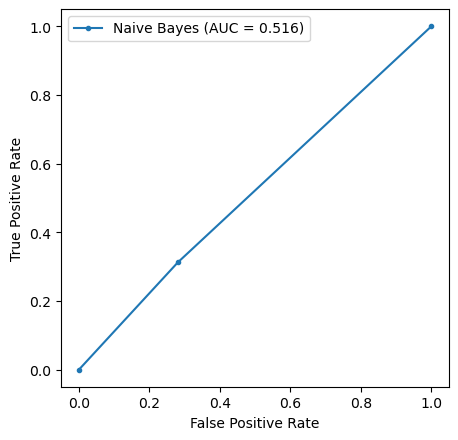

In [254]:
fpr, tpr, threshold = roc_curve(target_test, target_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, marker='.', label='Naive Bayes (AUC = %0.3f)' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()